# Fetch and Load the dataset from Kaggle

Run this section to automatically fetch the data using the Kaggle API

In [ ]:
!pip install -q kaggle

In [ ]:
# from google.colab import files
# files.upload() #Upload the kaggle API key (kaggle.json) to your Google Collab runtime

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"cyrillwicaksono","key":"719ae9d213bf1457eac0e1ff896a341e"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import kaggle
dataset_dir = 'laotse/credit-risk-dataset'

kaggle.api.authenticate()
kaggle.api.dataset_download_files(dataset_dir, path ='.', unzip= True)

Dataset URL: https://www.kaggle.com/datasets/laotse/credit-risk-dataset


## Load the dataset into a Pandas DataFrame

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/credit_risk_dataset.csv')

df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


# Take a Quick Look of the Data

In [ ]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


How many categories and their value counts for each categorical columns?

In [ ]:
cat_columns = df.select_dtypes(include=['object']).columns

for col in cat_columns:
  print(df[col].value_counts())
  print("===========")

person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64
loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64
loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64
cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64


Is there any missing value from the data?

In [ ]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


# Create a Test Set

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2,
                                       stratify=df['loan_status'], random_state=42)

In [ ]:
print("Whole Data Set Label Ratio: \n", df['loan_status'].value_counts()/len(df))
print("Train Set Label Ratio: \n", train_set['loan_status'].value_counts()/len(train_set))
print("Test Set Label Ratio: \n", test_set['loan_status'].value_counts()/len(test_set))

Whole Data Set Label Ratio: 
 loan_status
0    0.781836
1    0.218164
Name: count, dtype: float64
Train Set Label Ratio: 
 loan_status
0    0.781845
1    0.218155
Name: count, dtype: float64
Test Set Label Ratio: 
 loan_status
0    0.781801
1    0.218199
Name: count, dtype: float64


# Explore and Visualize the Training Data


In [ ]:
train_set.duplicated().sum()

96

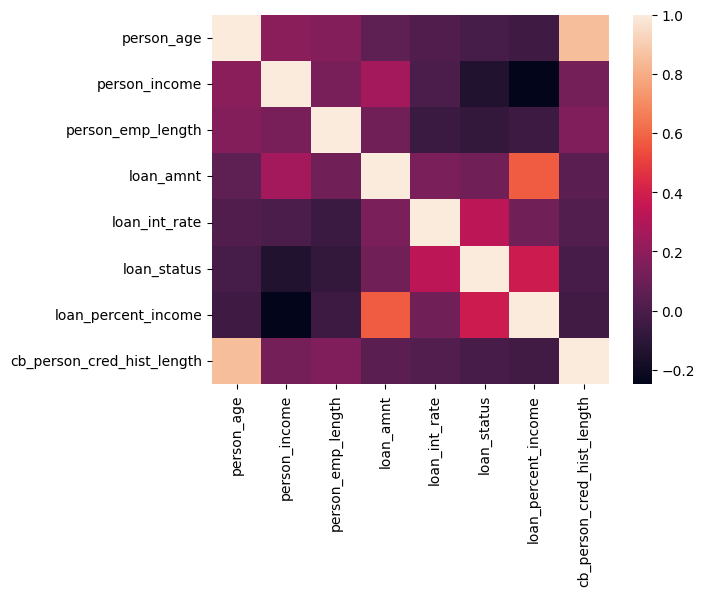

In [ ]:
sns.heatmap(train_set.corr(numeric_only=True))
plt.savefig("Correlation Heatmap.jpg")

<Axes: ylabel='loan_status'>

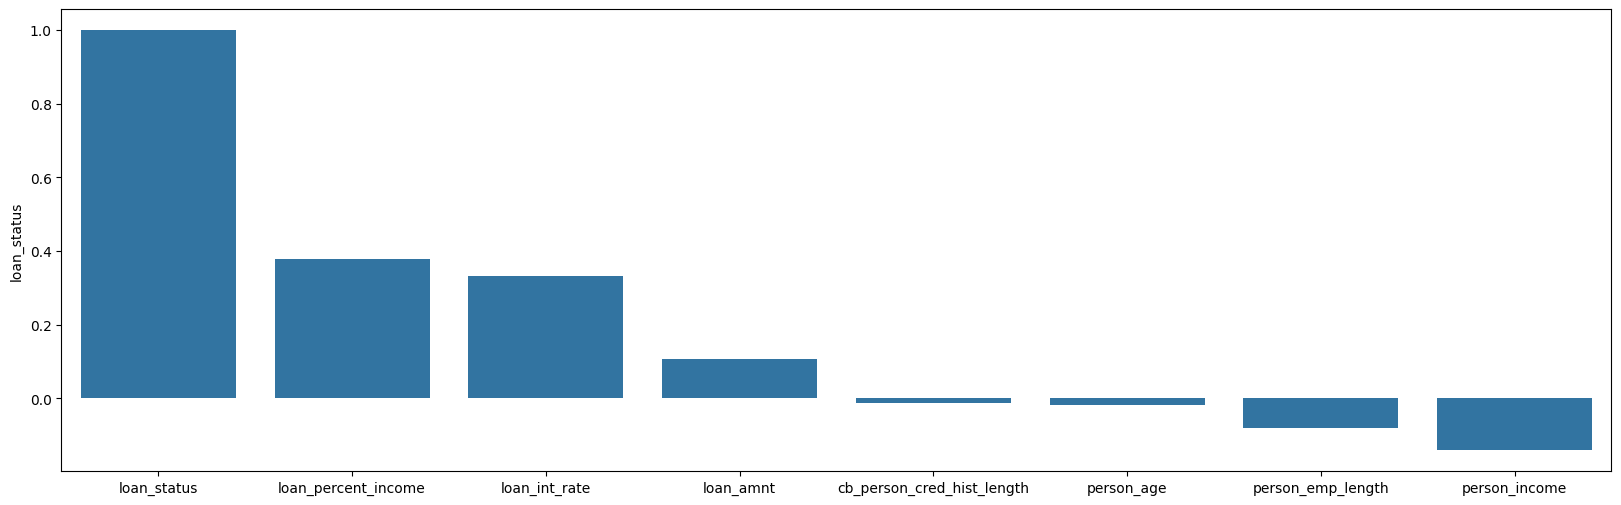

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(train_set.corr(numeric_only=True)['loan_status'].sort_values(ascending=False))

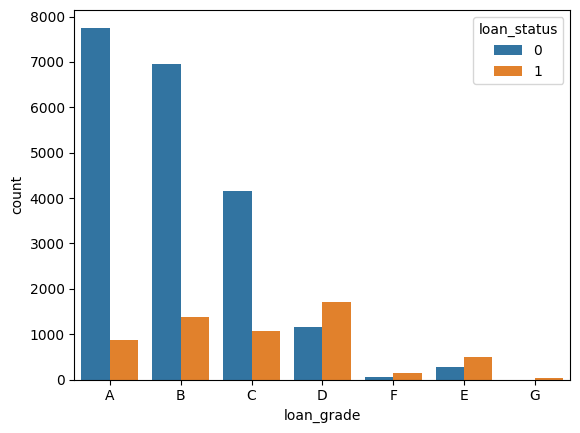

In [ ]:
sns.countplot(data=train_set, x='loan_grade', hue='loan_status')
plt.savefig("Loan Grade and Loan Status Relationship.jpg")

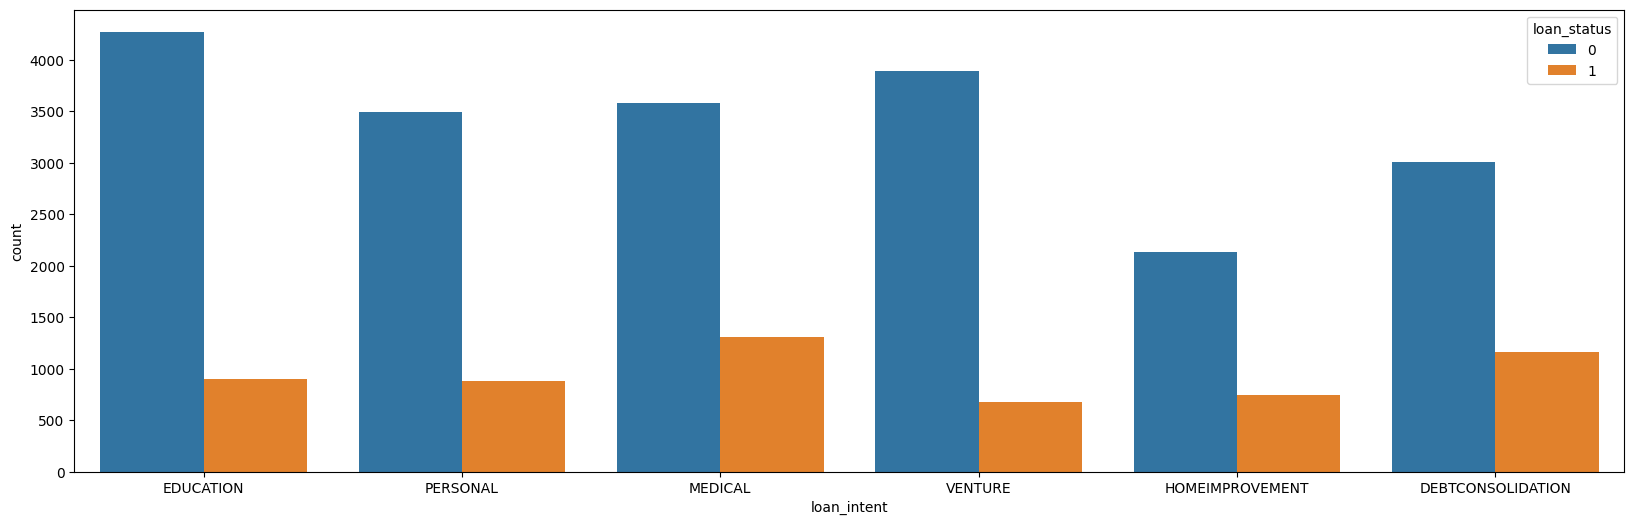

In [ ]:
plt.figure(figsize=(20, 6))
sns.countplot(data=train_set, x='loan_intent', hue='loan_status')
plt.savefig("Loan Intent and Loan Status Relationship.jpg")

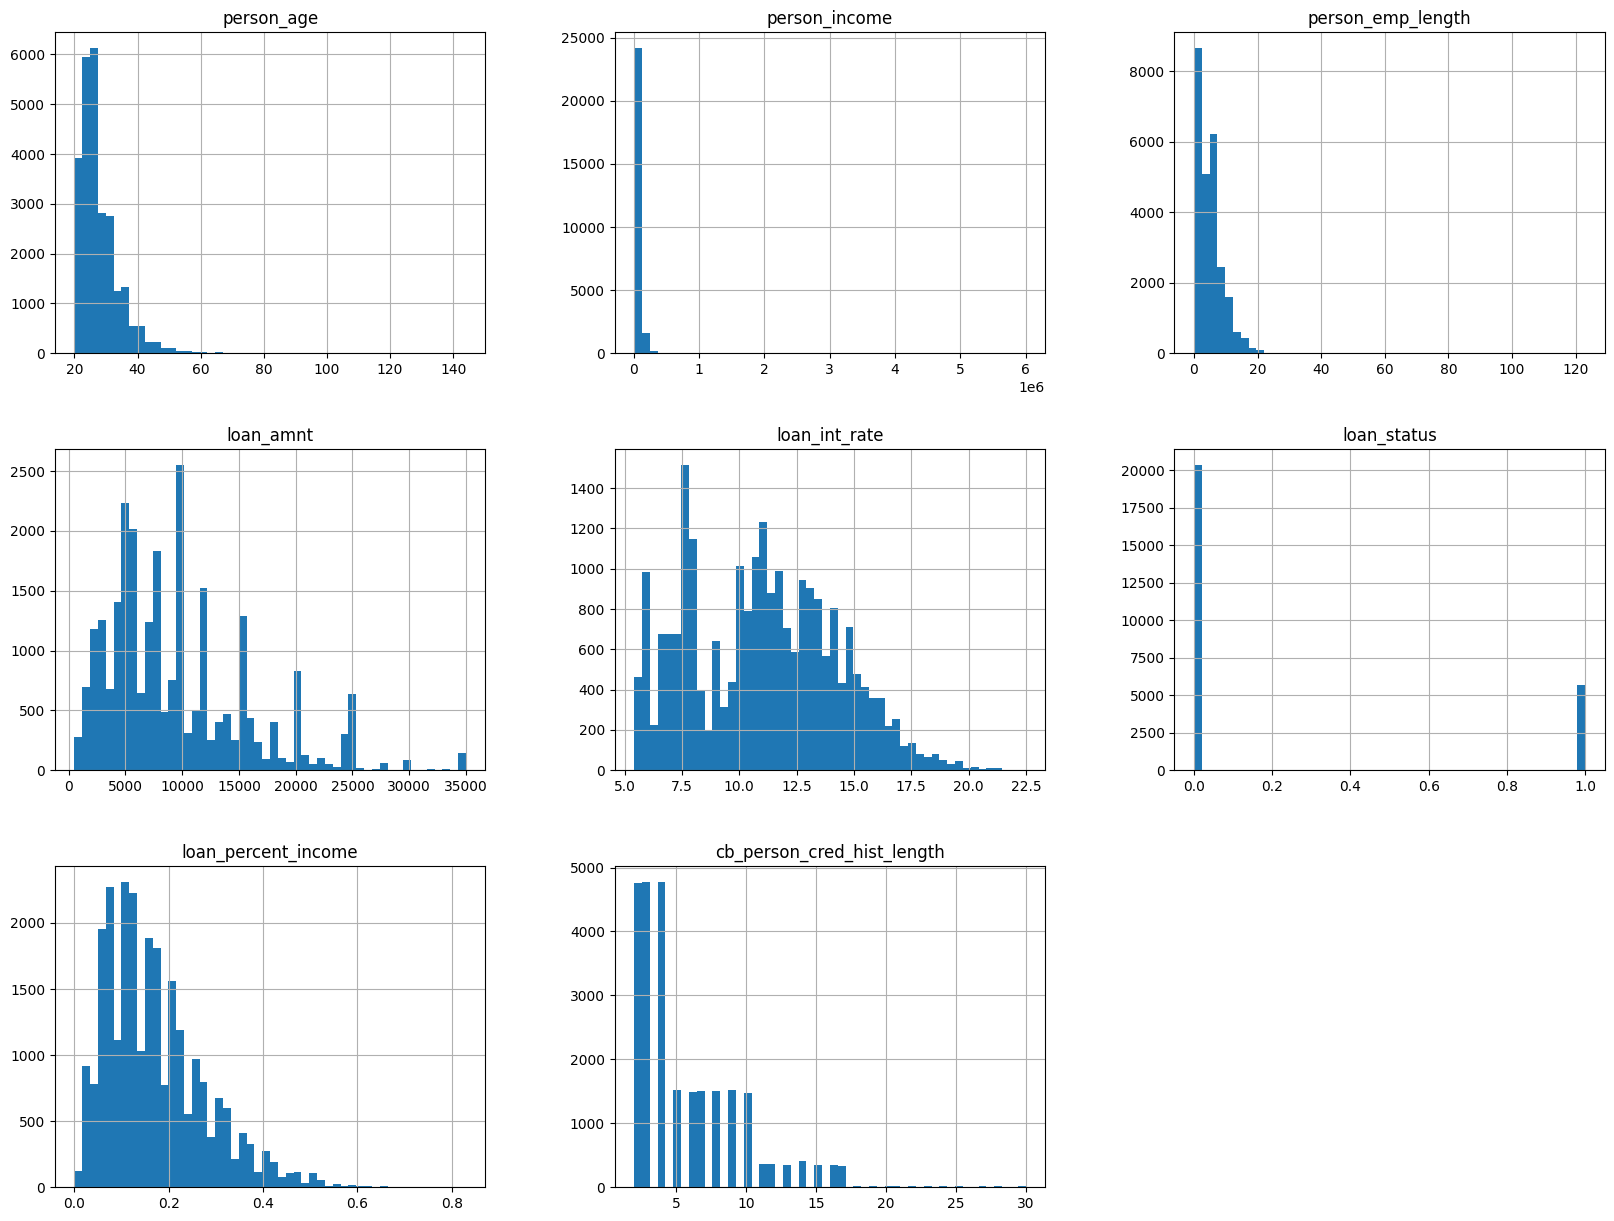

In [ ]:
train_set.hist(bins=50, figsize=(20,15))
plt.savefig("Numerical Data Histograms.jpg")
plt.show()

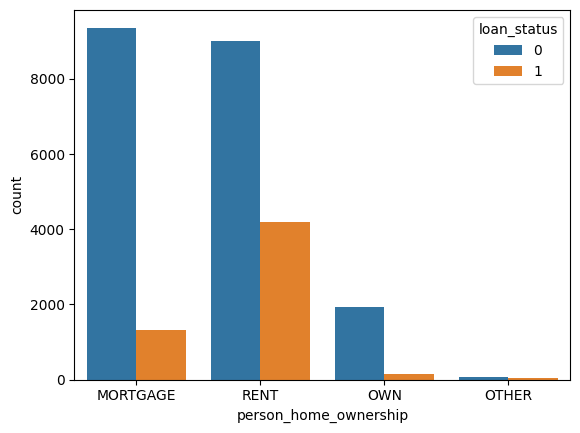

In [ ]:
sns.countplot(data=train_set, x='person_home_ownership', hue='loan_status')
plt.savefig("Person Home Ownership and Loan Status Relationship.jpg")

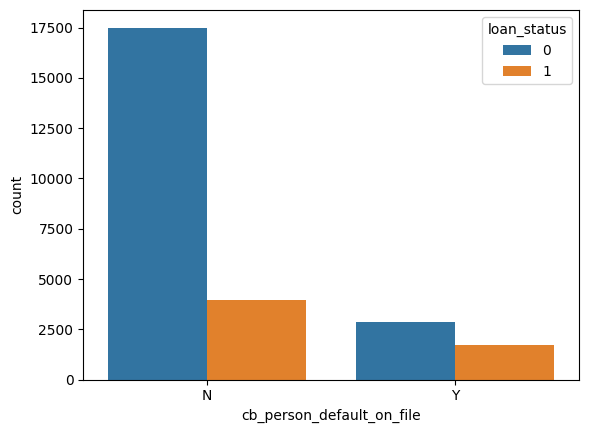

In [ ]:
sns.countplot(data=train_set, x='cb_person_default_on_file', hue='loan_status')
plt.savefig("Person Default on File and Loan Status Relationship.jpg")

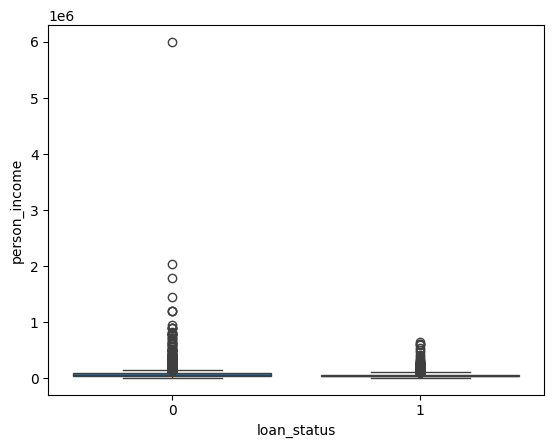

In [ ]:
sns.boxplot(data=train_set, x='loan_status', y='person_income')
plt.savefig("Person Income and Loan Status Relationship.jpg")

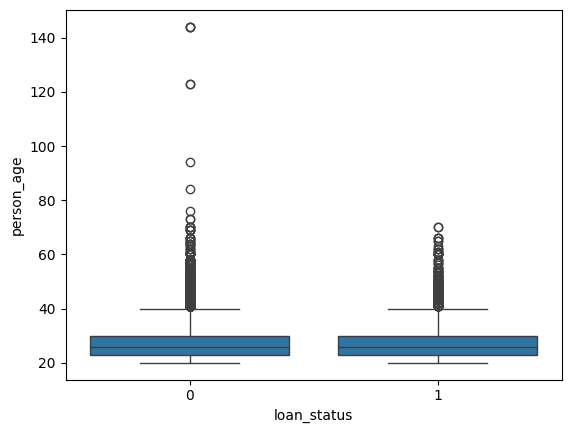

In [ ]:
sns.boxplot(data=train_set, x='loan_status', y='person_age')
plt.savefig("Person Age and Loan Status Relationship.jpg")

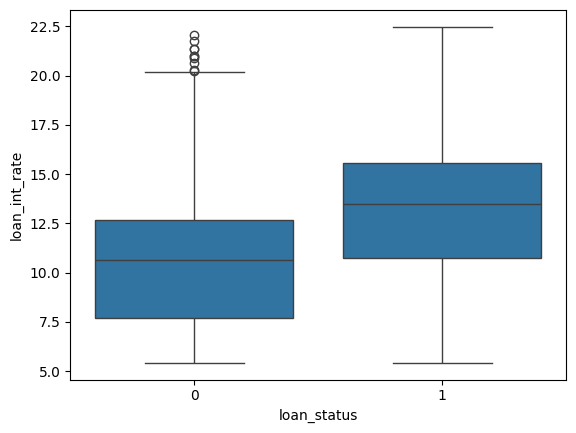

In [ ]:
sns.boxplot(data=train_set, x='loan_status', y='loan_int_rate')
plt.savefig("Loan Interest Rate and Loan Status Relationship.jpg")

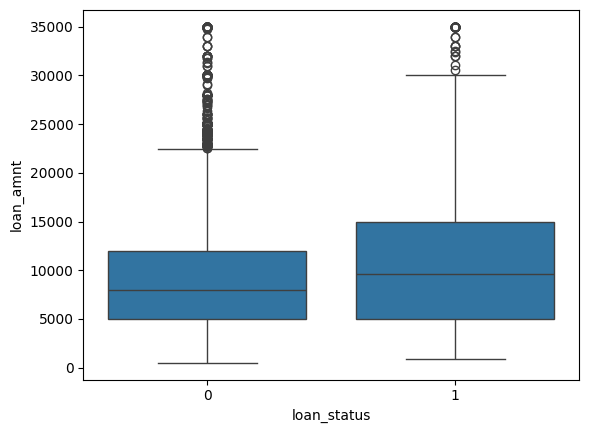

In [ ]:
sns.boxplot(data=train_set, x='loan_status', y='loan_amnt')
plt.savefig("Loan Amount and Loan Status Relationship.jpg")

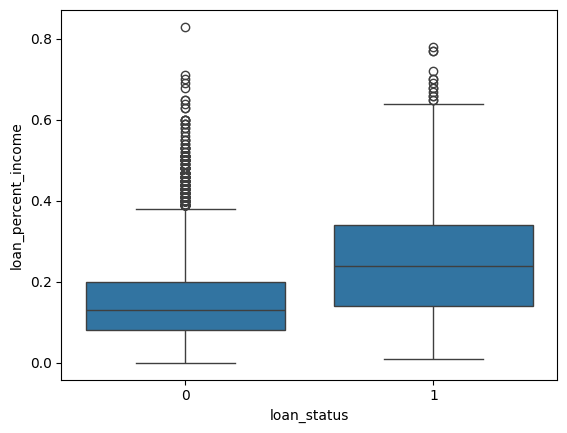

In [ ]:
sns.boxplot(data=train_set, x='loan_status', y='loan_percent_income')
plt.savefig("Loan Percent to Income and Loan Status Relationship.jpg")

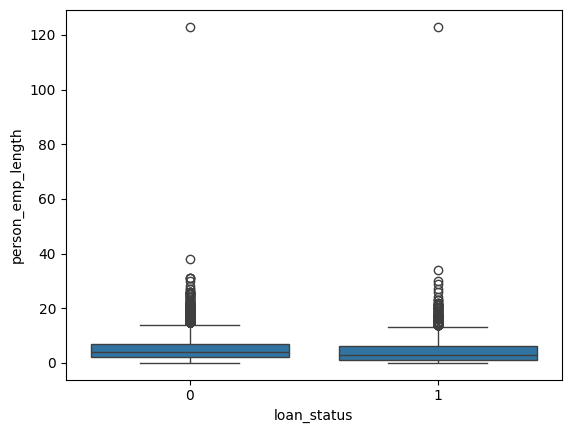

In [ ]:
sns.boxplot(data=train_set, x='loan_status', y='person_emp_length')
plt.savefig("Person Employment Length and Loan Status Relationship.jpg")

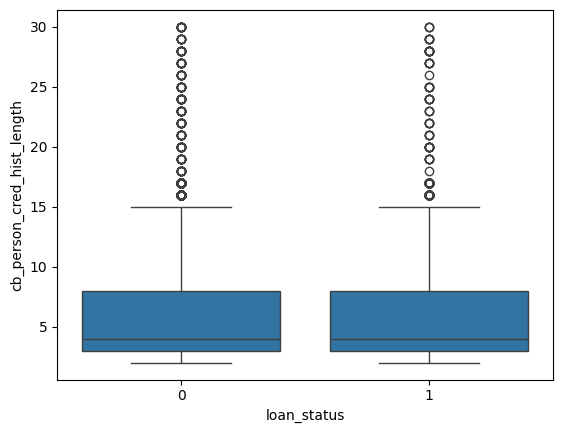

In [ ]:
sns.boxplot(data=train_set, x='loan_status', y='cb_person_cred_hist_length')
plt.savefig("Person Credit History Length and Loan Status Relationship.jpg")

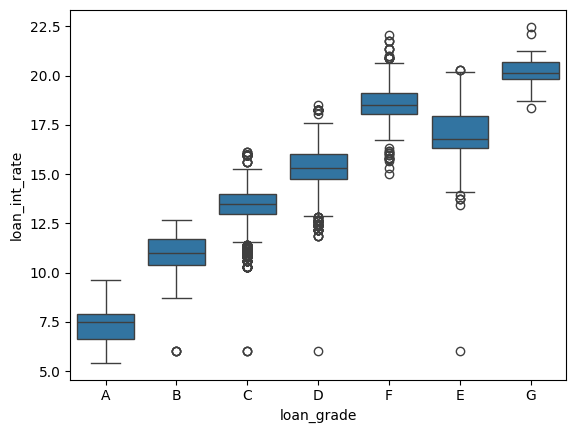

In [ ]:
sns.boxplot(data=train_set, x='loan_grade', y='loan_int_rate')
plt.savefig("Loan Interest Rate and Loan Grade Relationship.jpg")

# Data Preparation -- Experiment on the Copied Dataset

In [ ]:
train_cpy = train_set.copy()

In [ ]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

## Transform Categorical Features

In [ ]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
levar = {}
# Iterate through all categorical columns
def encode_cat(data):
  for col in data.select_dtypes(include=['object']).columns:
      encoder = preprocessing.LabelEncoder()
      data[col] = encoder.fit_transform(data[col])  # Perform label encoding
      levar[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

  for col, mapping in levar.items():
      print(f"Column: {col}")
      print(mapping,'\n')


## Data Cleaning

Handles missing values.

In [ ]:
from sklearn.impute import KNNImputer

def impute_missing_val(X, neighbors=5):
    data = X.copy()
    imputer = KNNImputer(n_neighbors=neighbors)
    data['person_emp_length'] = imputer.fit_transform(data[['person_emp_length']])
    data['loan_int_rate'] = imputer.fit_transform(data[['loan_int_rate']])
    return data

Handles Outliers

In [ ]:
def drop_outliers(X):
    data = X.copy()
    data = data.drop(data[data['person_age'] > 100].index)
    data = data.drop(data[data['person_emp_length'] > 100].index)
    return data

Drop duplicated values

In [ ]:
def drop_duplicates(X):
  data = X.copy()
  data.drop_duplicates(inplace=True)
  return data

## Numerical Feature Transformation

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def log_transform(df, columns):
    df_log = df.copy()
    for col in columns:
        df_log[col] = np.log1p(df[col])  # log1p(x) = log(1 + x) to handle zero values
    return df_log



In [ ]:
from sklearn.preprocessing import StandardScaler

def standardize_data(X):
    data = X.copy()
    num_features = data.select_dtypes(include=['int64', 'float64']).columns
    num_features = num_features.drop('loan_status')

    scaler = StandardScaler()
    data = log_transform(data, num_features)
    data[num_features] = scaler.fit_transform(data[num_features])
    return data

Apply all the functions

In [ ]:
train_cpy = impute_missing_val(train_cpy)
train_cpy = drop_outliers(train_cpy)
train_cpy = drop_duplicates(train_cpy)
train_cpy = standardize_data(train_cpy)
encode_cat(train_cpy)

Column: person_home_ownership
{'MORTGAGE': 0, 'OTHER': 1, 'OWN': 2, 'RENT': 3} 

Column: loan_intent
{'DEBTCONSOLIDATION': 0, 'EDUCATION': 1, 'HOMEIMPROVEMENT': 2, 'MEDICAL': 3, 'PERSONAL': 4, 'VENTURE': 5} 

Column: loan_grade
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6} 

Column: cb_person_default_on_file
{'N': 0, 'Y': 1} 



In [ ]:
train_cpy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25961 entries, 15884 to 17068
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  25961 non-null  float64
 1   person_income               25961 non-null  float64
 2   person_home_ownership       25961 non-null  int64  
 3   person_emp_length           25961 non-null  float64
 4   loan_intent                 25961 non-null  int64  
 5   loan_grade                  25961 non-null  int64  
 6   loan_amnt                   25961 non-null  float64
 7   loan_int_rate               25961 non-null  float64
 8   loan_status                 25961 non-null  int64  
 9   loan_percent_income         25961 non-null  float64
 10  cb_person_default_on_file   25961 non-null  int64  
 11  cb_person_cred_hist_length  25961 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 2.6 MB


In [ ]:
train_cpy.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15884,-0.417884,2.602867,0,0.149803,1,0,1.041483,-1.376611,0,-0.973688,0,-0.308262
15138,-1.299887,-1.990536,3,0.383865,4,1,-2.289135,0.475121,1,-0.867825,0,-0.308262
7474,-0.417884,-0.081243,0,1.162015,3,1,1.041483,0.573557,0,1.242087,0,-1.286694
18212,0.158660,-2.112512,2,0.339147,3,2,-0.595331,0.955925,1,1.242087,0,0.817580
6493,-0.417884,-0.184263,0,-0.505989,5,0,0.380057,-0.999604,0,0.331191,0,-1.286694


# Select and Train Model

Create a validation set

In [ ]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(train_cpy, test_size=0.2,
                                       stratify=train_cpy['loan_status'], random_state=42)

Separating the fatures and the labels

In [ ]:
X_train = train.drop('loan_status', axis=1)
y_train = train['loan_status'].copy()

X_val = val.drop('loan_status', axis=1)
y_val = val['loan_status'].copy()

Try several models

In [ ]:
!pip install --upgrade catboost
!pip install lightgbm

In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Classifier': SVC(probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Stochastic Gradient Descent': SGDClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=45),
    "LightGBM": LGBMClassifier(boosting_type='gbdt', bagging_fraction=0.9, learning_rate=0.05, feature_fraction=0.9, bagging_freq=50, verbosity=-1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)

}


results = []
trained_model = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on validation set
    y_val_pred = model.predict(X_val)
    trained_model[name] = model

    print("Model: ", name)

    print("Accuracy: ", accuracy_score(y_val, y_val_pred))
    print("F1: ", f1_score(y_val, y_val_pred))
    print("Precision: ", precision_score(y_val, y_val_pred))
    print("Recall: ", recall_score(y_val, y_val_pred))
    print("\n")




/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Model:  Logistic Regression
Accuracy:  0.8503755054881571
F1:  0.5847140566541956
Precision:  0.7432065217391305
Recall:  0.4819383259911894


Model:  Decision Tree
Accuracy:  0.8838821490467937
F1:  0.7410905968226706
Precision:  0.7227805695142379
Recall:  0.760352422907489


Model:  Random Forest
Accuracy:  0.9281725399576353
F1:  0.8097909229984702
Precision:  0.9612590799031477
Recall:  0.6995594713656388


Model:  Support Vector Classifier
Accuracy:  0.8875409204698633
F1:  0.6948798328108673
Precision:  0.8536585365853658
Recall:  0.5859030837004405


Model:  K-Nearest Neighbors
Accuracy:  0.887733487386867
F1:  0.7054067710965134
Precision:  0.8270142180094787
Recall:  0.614977973568282


Model:  Naive Bayes
Accuracy:  0.8189870980165608
F1:  0.6073517126148705
Precision:  0.5774424146147736
Recall:  0.6405286343612335


Model:  Stochastic Gradient Descent
Accuracy:  0.838051222799923
F1:  0.5113306217315514
Precision:  0.7508532423208191
Recall:  0.3876651982378855


Model:  X

# Hyperparameter Tuning
use the randomized search Hyperparameter

In [ ]:
!pip install --upgrade xgboost

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for grid search

param_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', None],
}

param_cat = {
    'iterations': [500, 700, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7],
    'border_count': [32, 64, 128],
}

param_lgbm = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [15, 31, 63],
    'feature_fraction': [0.6, 0.8, 1.0],
    'bagging_fraction': [0.6, 0.8, 1.0],
}

# GridSearchCV for each model

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_rf,
    cv=2,
    scoring='recall',
    verbose=1,
    n_jobs=-1
)

grid_cat = GridSearchCV(
    CatBoostClassifier(verbose=0, random_state=42),
    param_grid=param_cat,
    cv=2,
    scoring='recall',
    verbose=1,
    n_jobs=-1
)

grid_lgbm = GridSearchCV(
    LGBMClassifier(random_state=42),
    param_grid=param_lgbm,
    cv=2,
    scoring='recall',
    verbose=1,
    n_jobs=-1
)

# Fitting the models
grid_rf.fit(X_train, y_train)
grid_cat.fit(X_train, y_train)
grid_lgbm.fit(X_train, y_train)


Fitting 2 folds for each of 243 candidates, totalling 486 fits
Fitting 2 folds for each of 432 candidates, totalling 864 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Fitting 2 folds for each of 729 candidates, totalling 1458 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


GridSearchCV(cv=2, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
             param_grid={'bagging_fraction': [0.6, 0.8, 1.0],
                         'feature_fraction': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 500],
                         'num_leaves': [15, 31, 63]},
             scoring='recall', verbose=1)

In [ ]:
print('Best Grid Search CatBoost Parameters :',grid_cat.best_params_)
print('Best Grid Search CatBoost Score : ',grid_cat.best_score_)
print('Best Grid Search Random Forrest Parameters :',grid_rf.best_params_)
print('Best Grid Search Random Forrest Score : ',grid_rf.best_score_)
print('Best Grid Search LGBM Parameters :',grid_lgbm.best_params_)
print('Best Grid Search LGBM Score : ',grid_lgbm.best_score_)

Best Grid Search CatBoost Parameters : {'border_count': 128, 'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 5, 'learning_rate': 0.1}
Best Grid Search CatBoost Score :  0.7348616049519221
Best Grid Search Random Forrest Parameters : {'max_depth': 15, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Grid Search Random Forrest Score :  0.7079956626066648
Best Grid Search LGBM Parameters : {'bagging_fraction': 0.6, 'feature_fraction': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500, 'num_leaves': 63}
Best Grid Search LGBM Score :  0.7401469786641373


Train the model using the tuned Hyperparameter

In [ ]:
models = {
    'Random Forest': RandomForestClassifier(**grid_rf.best_params_, random_state=42),
    'CatBoost': CatBoostClassifier(**grid_cat.best_params_, verbose=0, random_state=42),
    "LightGBM": LGBMClassifier(**grid_lgbm.best_params_, random_state=42),
}

trained_models = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on validation set
    y_val_pred = model.predict(X_val)
    trained_models[name] = model

    print("Model: ", name)

    print("Accuracy: ", accuracy_score(y_val, y_val_pred))
    print("F1: ", f1_score(y_val, y_val_pred))
    print("Precision: ", precision_score(y_val, y_val_pred))
    print("Recall: ", recall_score(y_val, y_val_pred))
    print("\n")


Model:  Random Forest
Accuracy:  0.92894280762565
F1:  0.8118306986231515
Precision:  0.9636803874092009
Recall:  0.7013215859030837


Model:  CatBoost
Accuracy:  0.9335644136337378
F1:  0.827930174563591
Precision:  0.9540229885057471
Recall:  0.7312775330396476


Model:  LightGBM
Accuracy:  0.9337569805507414
F1:  0.8305418719211822
Precision:  0.9418994413407821
Recall:  0.7427312775330397




# Predict and Evaluate with Test Data

In [ ]:
test_set.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
6616,22,50000,RENT,6.0,PERSONAL,B,6000,11.89,0,0.12,N,2
21802,32,52000,RENT,0.0,PERSONAL,A,7125,7.49,0,0.14,N,10
31886,37,205000,MORTGAGE,3.0,EDUCATION,B,18000,10.39,0,0.09,N,14
17799,26,100000,MORTGAGE,5.0,DEBTCONSOLIDATION,B,24000,10.99,0,0.24,N,4
5207,23,44340,OWN,0.0,VENTURE,C,3000,12.98,0,0.07,Y,3


Apply all the preprocessing functions and separate the features and labels

In [ ]:
test_set = impute_missing_val(test_set)
test_set = drop_outliers(test_set)
test_set = drop_duplicates(test_set)
test_set = standardize_data(test_set)
encode_cat(test_set)

Column: person_home_ownership
{'MORTGAGE': 0, 'OTHER': 1, 'OWN': 2, 'RENT': 3} 

Column: loan_intent
{'DEBTCONSOLIDATION': 0, 'EDUCATION': 1, 'HOMEIMPROVEMENT': 2, 'MEDICAL': 3, 'PERSONAL': 4, 'VENTURE': 5} 

Column: loan_grade
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6} 

Column: cb_person_default_on_file
{'N': 0, 'Y': 1} 



In [ ]:
X_test = test_set.drop('loan_status', axis=1)
y_test = test_set['loan_status'].copy()

Predict the test data with the previously trained models

In [ ]:
for name, model in trained_models.items():
    y_test_pred = model.predict(X_test)

    print("Model: ", name)

    print("Accuracy: ", accuracy_score(y_test, y_test_pred))
    print("F1: ", f1_score(y_test, y_test_pred))
    print("Precision: ", precision_score(y_test, y_test_pred))
    print("Recall: ", recall_score(y_test, y_test_pred))
    print("\n")

Model:  Random Forest
Accuracy:  0.929921622867681
F1:  0.815831987075929
Precision:  0.957345971563981
Recall:  0.7107670654468684


Model:  CatBoost
Accuracy:  0.9270016904871676
F1:  0.8135060855908912
Precision:  0.9200710479573713
Recall:  0.729064039408867


Model:  LightGBM
Accuracy:  0.9300753035192869
F1:  0.8198019801980198
Precision:  0.9375
Recall:  0.7283603096410978




# Explanability


Random Forest Feature Importance:
                       Feature  Importance
8          loan_percent_income    0.262636
5                   loan_grade    0.189266
2        person_home_ownership    0.163512
1                person_income    0.119857
4                  loan_intent    0.093318
3            person_emp_length    0.050603
7                loan_int_rate    0.041314
6                    loan_amnt    0.028858
0                   person_age    0.027203
10  cb_person_cred_hist_length    0.019563
9    cb_person_default_on_file    0.003871


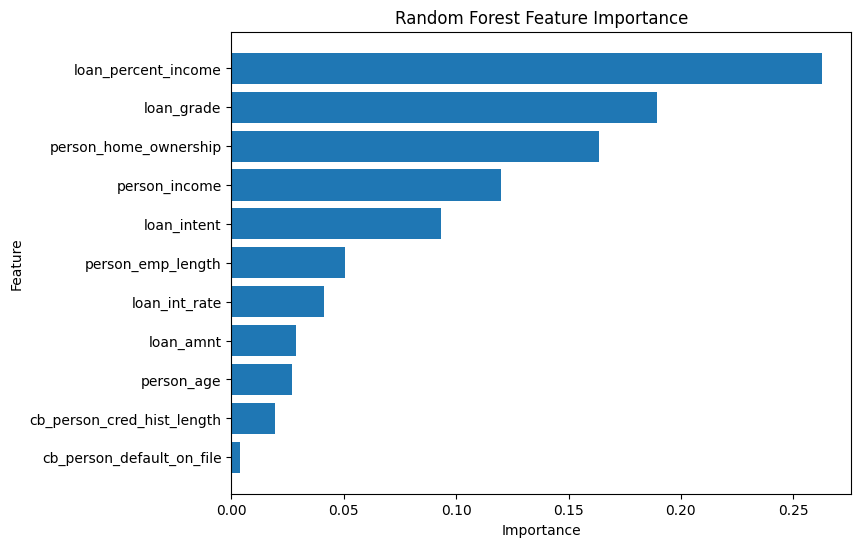


CatBoost Feature Importance:
                       Feature  Importance
8          loan_percent_income   20.173963
2        person_home_ownership   17.169993
1                person_income   15.099137
4                  loan_intent   12.114706
5                   loan_grade   11.741000
7                loan_int_rate    6.540350
3            person_emp_length    6.047797
6                    loan_amnt    4.461754
0                   person_age    3.878004
10  cb_person_cred_hist_length    2.256102
9    cb_person_default_on_file    0.517193


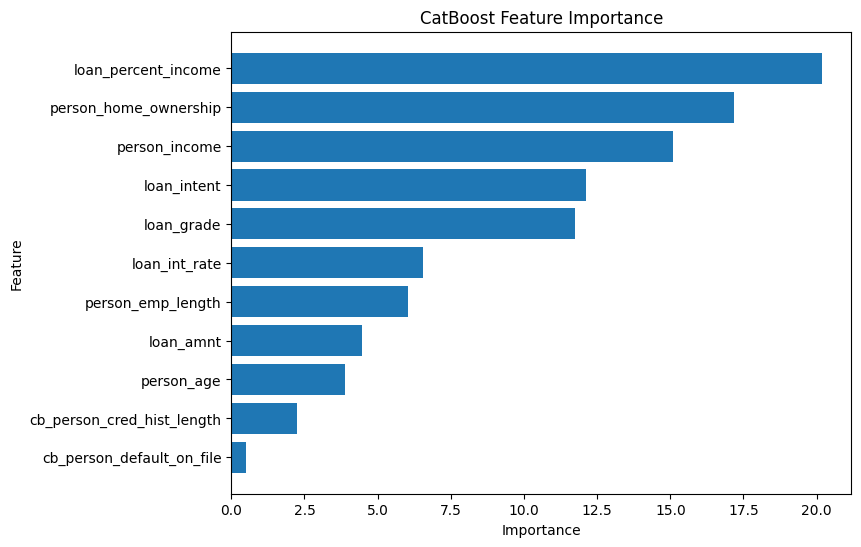


LightGBM Feature Importance:
                       Feature  Importance
1                person_income        5654
7                loan_int_rate        4679
6                    loan_amnt        3224
3            person_emp_length        2474
8          loan_percent_income        2456
0                   person_age        2365
4                  loan_intent        1942
10  cb_person_cred_hist_length        1637
2        person_home_ownership         980
5                   loan_grade         959
9    cb_person_default_on_file         285


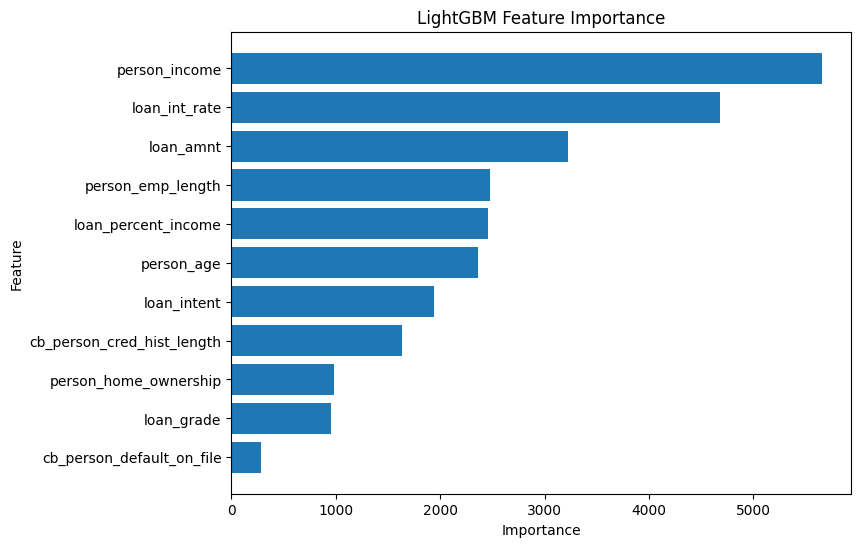

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = {}
for name, model in trained_models.items():

    if hasattr(model, 'feature_importances_'):
        feature_importance[name] = model.feature_importances_
    else:
        feature_importance[name] = None  # For compatibility

# Feature importance visualization
for name, importance in feature_importance.items():
    if importance is not None:
        print(f"\n{name} Feature Importance:")
        importance_df = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': importance
        }).sort_values(by='Importance', ascending=False)
        print(importance_df)

        # Plot feature importance
        plt.figure(figsize=(8, 6))
        plt.barh(importance_df['Feature'], importance_df['Importance'])
        plt.title(f"{name} Feature Importance")
        plt.xlabel("Importance")
        plt.ylabel("Feature")
        plt.gca().invert_yaxis()
        plt.savefig(f"{name} Feature Importance.jpg")
        plt.show()
